# Seaborn data visualization 

- Combine Matplotlib and Seaborn to get insights from data. 
The aim of this document is to make a complete visualization and basic statistics **study guide** using the conventional Python Data Science Libraries.

In [1]:
# Import data science libraries
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

- First part of the guide includes available data sets though Seaborn. 
- Second part of this guide is based on generated data. 
<br/>Use the following matplotlib reference [colormaps](https://matplotlib.org/stable/gallery/color/colormap_reference.html)

### Available datasets 
- tips data
- flights data
- titanic data
#### Plots for numerical data
- distribution plots
- joint plots
- pair plots
- rug plots
- correlation data (heatmaps)
#### Plots for categorical data 
- bar plots
- box plots 

### Distribution plot 

- Usually used to describe **univariate** data. Applied to one column of numerical data.

In [2]:
# Load the tips dataset available from seaborn library:
tips = sns.load_dataset('tips')
tips.tail() 

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [3]:
# Get the main characteristics of the data set
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


Which visualizations apply to the columns and the different data types?
- the numerical columns are floats and integers
- the categorical columns are categories

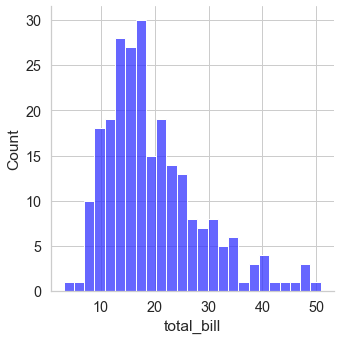

In [41]:
# Visualize the distribution of some variable
sns.displot(tips['total_bill'], color= '#3333FF', bins=25)

### Joint plot

- Used for **bivariate** data, in which you can combine two diferent distribution plots. 

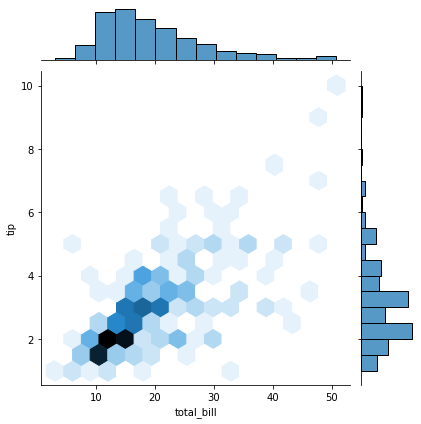

In [5]:
# Visualize the distribution of two numerical variables 
sns.jointplot(x=tips['total_bill'],y=tips['tip'],kind='hex')

### Pairplot

- Used to plot **pairwaise** relationships between **all** the **numerical data** in the dataset.

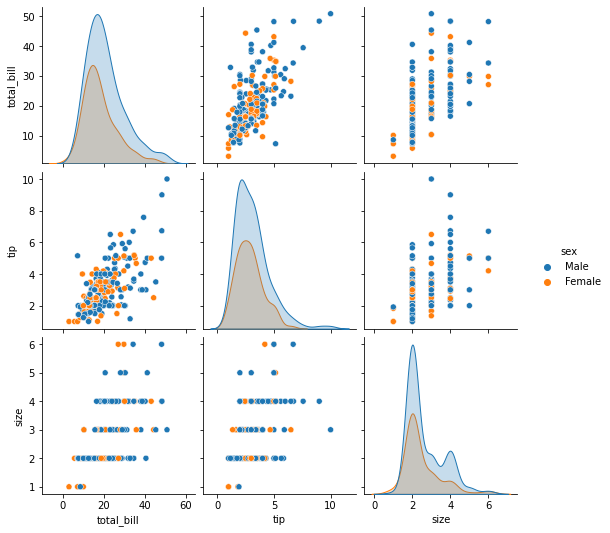

In [6]:
# Apply the pairplot on all the data 
sns.pairplot(tips,hue='sex')

### Rugplot

- Used to display the **density** of the information of one variable. 

<AxesSubplot:xlabel='total_bill'>

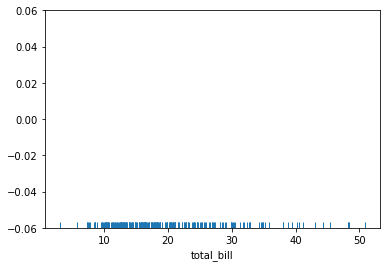

In [7]:
# Rugplots and kde
# kde: Kernel Density Estimation plots which are the sum of many normal distributions
sns.rugplot(tips['total_bill'])

## Plots for categorical data

### Barplots

- Aggreates some **categorical** variable data **based of some funciton** (usually the mean)

In [8]:
import numpy as np

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

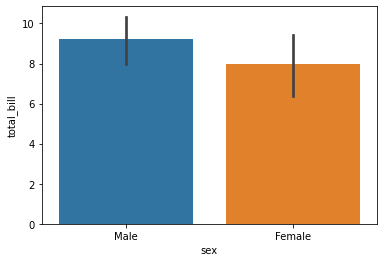

In [9]:
# Do males pay more, on average, than females?
sns.barplot(x='sex', y='total_bill', data=tips, estimator=np.std)

### Count plot

- It is a visiualization of the pandas dataframe .count() function in which the total ocurrences are sumed. 

<AxesSubplot:xlabel='sex', ylabel='count'>

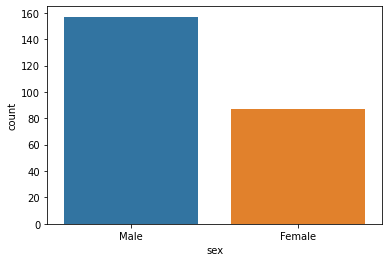

In [10]:
# How many males vs females in the data?
sns.countplot(x='sex',data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

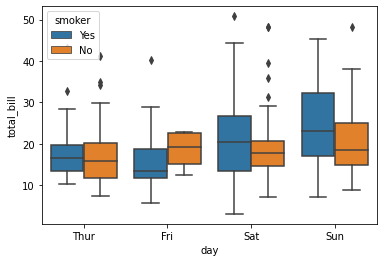

In [11]:
sns.boxplot(x='day', y='total_bill', data=tips, hue='smoker')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

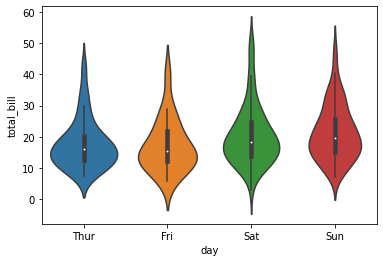

In [12]:
# A lot more information on the kde of each variable
sns.violinplot(x='day', y='total_bill', data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

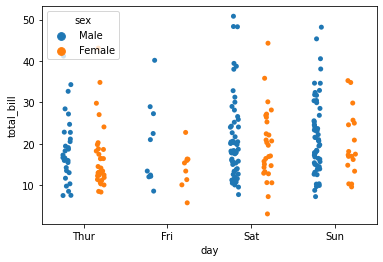

In [13]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True, hue='sex', dodge=True)

## Correlation data

### Matrix plot (heatmap)

- The **heatmap** is used on correlated data. Thefore, we have to find the correlations between variables in a dataset by building a **correlation matrix**. 

In [14]:
# First, draw a correlation matrix
cor_mat = tips.corr()
cor_mat

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:>

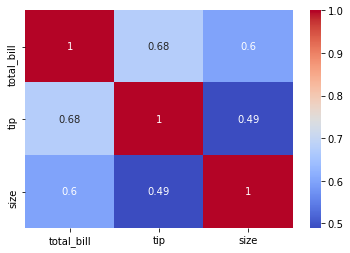

In [15]:
# Last, apply a heatmap visualization on it
sns.heatmap(cor_mat, annot=True, cmap='coolwarm')

In [16]:
# For some dataset the correlations are not so clear
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [17]:
# For this kind of data you can use a pivot table instead of a corr mat
pi_table = flights.pivot_table(index='year', columns='month', values='passengers')
pi_table

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


Text(0.5, 1.0, 'Number of flights')

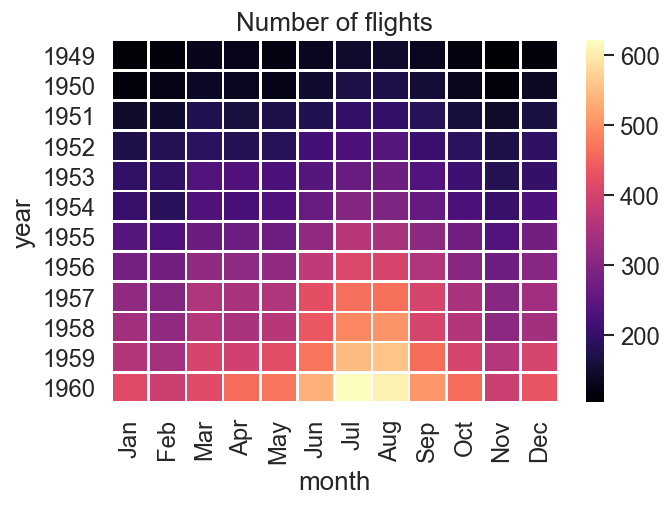

In [87]:
plt.figure(dpi=120)
sns.heatmap(pi_table, cmap='magma', lw=1, linecolor='white')
plt.title('Number of flights')

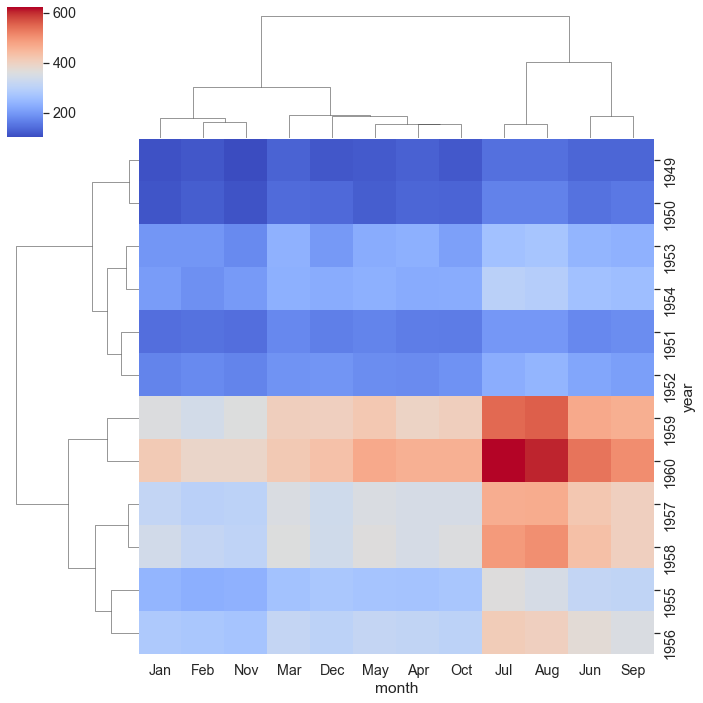

In [70]:
# For further info on similarities between variables use cluster map
sns.clustermap(pi_table, cmap='coolwarm')

In [20]:
iris = sns.load_dataset('iris')
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [21]:
# Play with the variables by selecting columns
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Text(0.5, 1.0, 'Iris species')

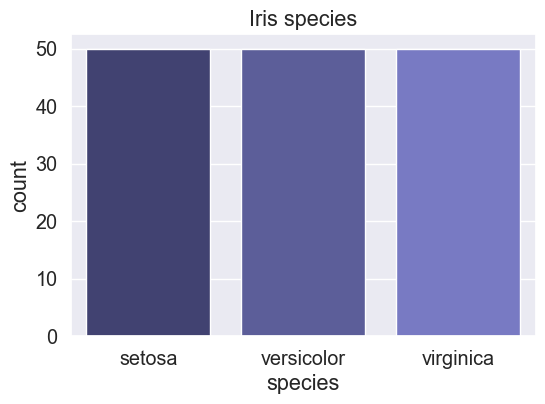

In [22]:
# In this data set there are the same number of counts per species
plt.figure(dpi=100)
sns.set_context(context='notebook', font_scale=1.3)
sns.set_style('darkgrid')
sns.set_palette('tab20b')
sns.countplot(data=iris, x='species')
plt.title('Iris species')

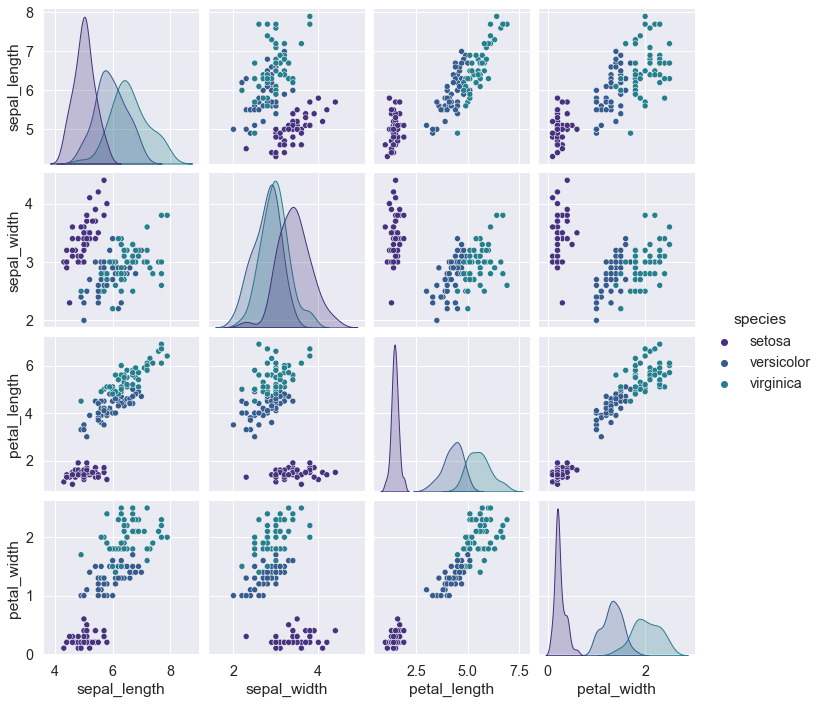

In [23]:
sns.set_palette('viridis')
sns.pairplot(iris, hue='species')

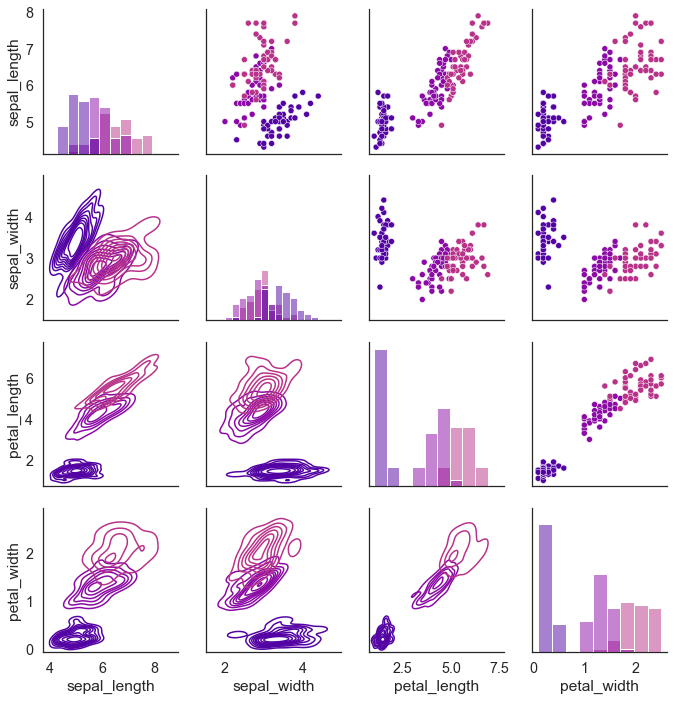

In [68]:
sns.set_palette('plasma')
visual_iris = sns.PairGrid(iris, hue='species')
visual_iris.map_diag(sns.histplot)
visual_iris.map_upper(sns.scatterplot)
visual_iris.map_lower(sns.kdeplot)

plt.show()

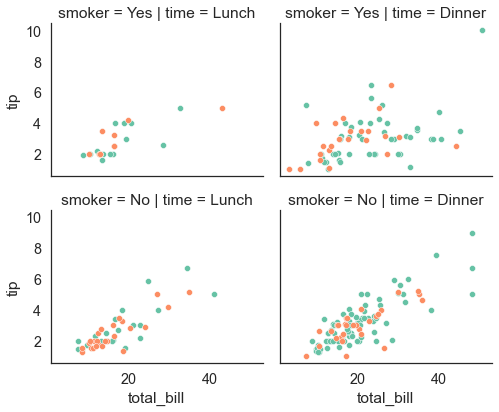

In [126]:
sns.set_palette('Set2')
tip = sns.FacetGrid(data=tips, col='time', row='smoker', hue='sex', aspect=1.2)
tip.map(sns.scatterplot,'total_bill','tip')
plt.show()

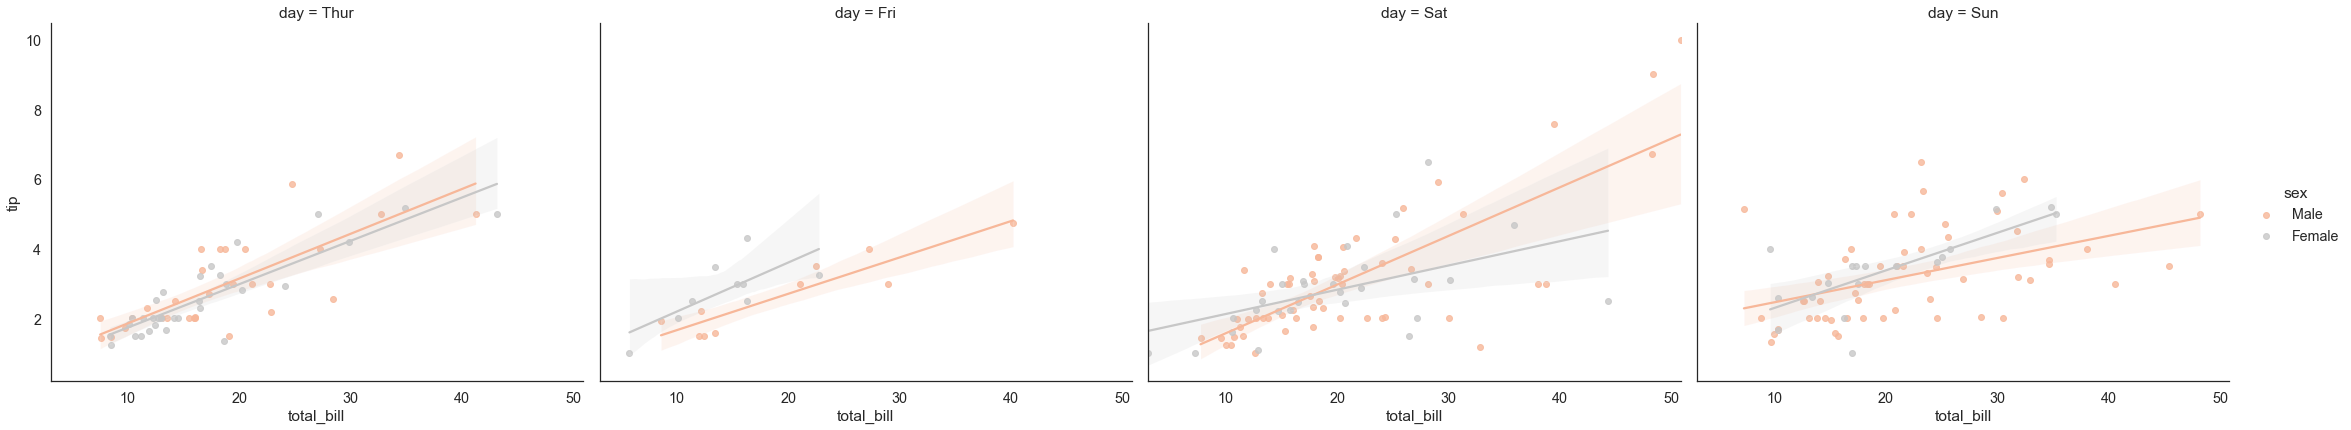

In [62]:
# To visualize the relationship between variables
sns.set_style('white')
sns.lmplot(data=tips, x='total_bill', y='tip', hue='sex', aspect=1.3, col='day', height=6, palette='RdGy')

In [27]:
titanic = sns.load_dataset('titanic')
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


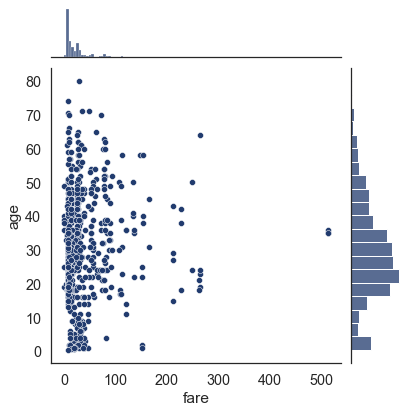

In [28]:
sns.set_palette('cividis')
sns.jointplot(data=titanic, x='fare', y='age')

Text(0.5, 1.0, 'Fare counts')

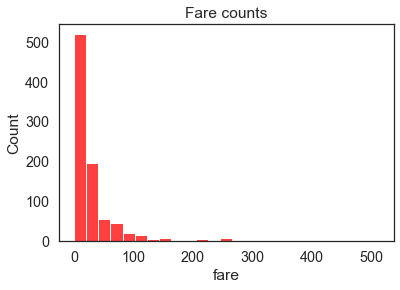

In [29]:
sns.histplot(data=titanic['fare'], bins=25, color='red')
plt.title('Fare counts')

<AxesSubplot:xlabel='class', ylabel='age'>

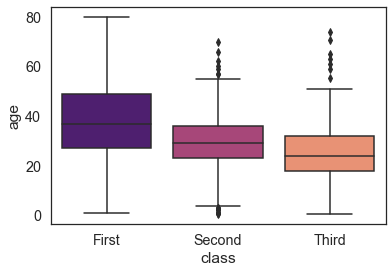

In [30]:
sns.boxplot(data=titanic, x='class', y='age', palette='magma')

<AxesSubplot:xlabel='sex', ylabel='count'>

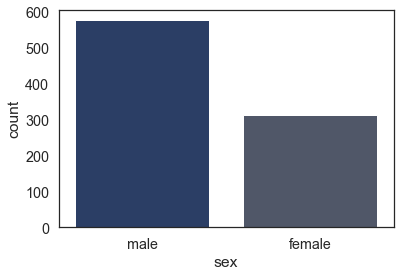

In [31]:
sns.countplot(data=titanic, x='sex')


In [32]:
titanic_mat = titanic.corr()

Text(0.5, 1.0, 'Correlation Titanic Dataset')

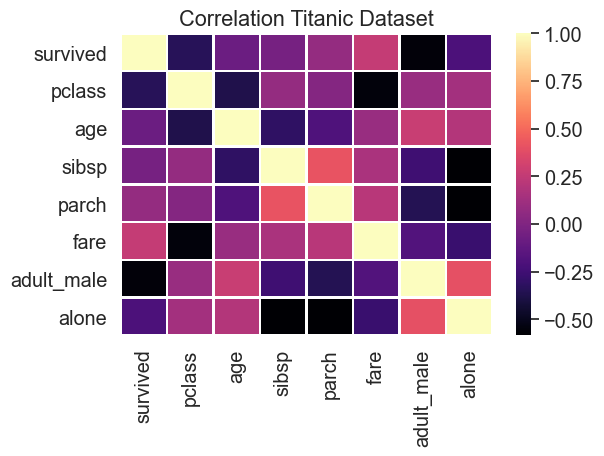

In [42]:
plt.figure(dpi=100)
sns.heatmap(data=titanic_mat, cmap='magma', lw=1, linecolor='white')
plt.title('Correlation Titanic Dataset')

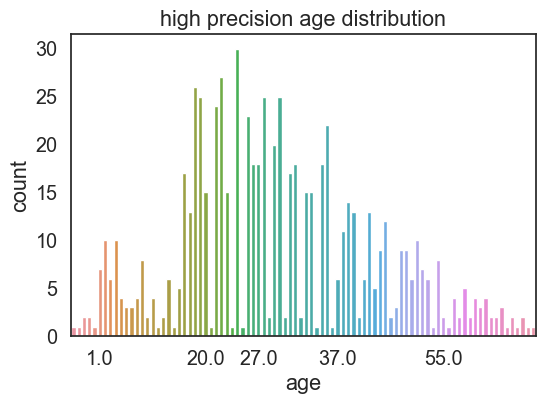

In [118]:
plt.figure(dpi=100)
tit_count= sns.countplot(data=titanic, x='age')
tit_count.set(xticks=[5, 25, 35, 50, 70]) # reference age values
plt.title('high precision age distribution')

plt.show()

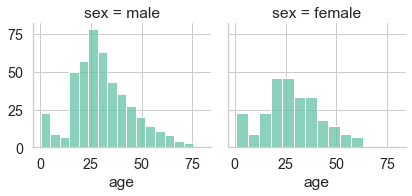

In [130]:
sns.set_style('whitegrid')
tip = sns.FacetGrid(data=titanic, col='sex')
tip.map(sns.histplot,'age')
plt.tight_layout()

## Genertaing your own data for analysis using NumPy

In [36]:
## generate your own data

# dataset size
m = 30
n = 6

data = np.zeros((m,n))

# fill in the matrix
for i in range(n):
    data[:,i]=30*np.random.randn(m) * (2*i/(n-1)-1)**2 + (i+1)**2
    
# scaling term: affects the variance 
# aditive term: increases numerical value columnwise

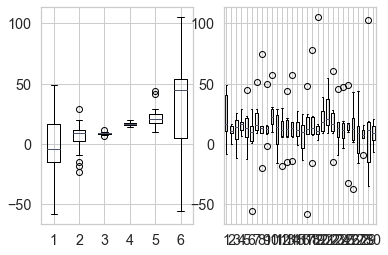

In [40]:
# unpacking
df = pd.DataFrame(data, columns=['zero','one','two','three','four','five'])
fig,ax = plt.subplots(nrows=1, ncols=2)

# plotting and comparison 
ax[0].boxplot(df)
ax[1].boxplot(df.T)

plt.show()

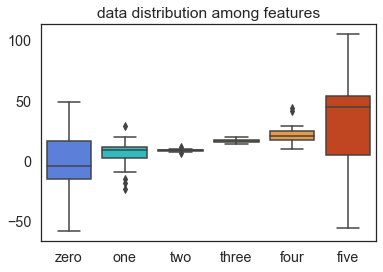

In [85]:
sns.boxplot(data=df, palette='turbo')
plt.title('data distribution among features')

plt.show()

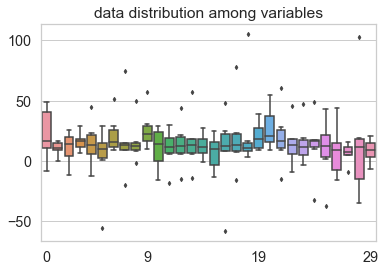

In [136]:
box = sns.boxplot(data=df.T, width=0.8, fliersize=3)
box.set(xticks=[0,9,19,29]) # reference values
plt.title('data distribution among variables')

plt.show()